In [ ]:
!pip install pandas
!pip install numpy
!pip install mlxtend
!pip install matplotlib
!pip install seaborn

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
df = pd.read_excel('/content/drive/MyDrive/Dataset/Dataset_MiniMarket.xlsx')
df.head()

,Transaksi,Tanggal,Barang
0,1,1 09 2023,We Care M2
1,1,1 09 2023,Ciptadent Ice Mint
2,1,1 09 2023,Gopek Slawi Merah
3,1,1 09 2023,Rexona Deo Lotion Free Spirit
4,1,1 09 2023,Nuvo Family Merah


In [ ]:
df.tail()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Transaksi,Tanggal,Barang
10436,1982,30 11 2023,Milku Coklat
10437,1983,30 11 2023,Aqua
10438,1983,30 11 2023,Minute Maid Nutriboost Strawberry
10439,1983,30 11 2023,Golda Capuccino
10440,1983,30 11 2023,Sari Roti Zuper Creamy Coklat


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10441 entries, 0 to 10440
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Transaksi  10441 non-null  int64 
 1   Tanggal    10441 non-null  object
 2   Barang     10441 non-null  object
dtypes: int64(1), object(2)
memory usage: 244.8+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Transaksi
count,10441.000000
mean,977.953357
std,578.254769
min,1.000000
25%,469.000000
50%,965.000000
75%,1473.000000
max,1983.000000


In [ ]:
df.isnull().any()

Transaksi    False
Tanggal      False
Barang       False
dtype: bool

In [ ]:
transactions_str = df.groupby(['Transaksi', 'Barang'])['Barang'].count().reset_index(name ='Count')
transactions_str

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Transaksi,Barang,Count
0,1,Ciptadent Ice Mint,1
1,1,Gopek Slawi Merah,1
2,1,Nuvo Family Merah,1
3,1,Rexona Deo Lotion Free Spirit,1
4,1,We Care M2,1
...,...,...,...
10433,1982,Sun Ayam Kampung,1
10434,1983,Aqua,1
10435,1983,Golda Capuccino,1
10436,1983,Minute Maid Nutriboost Strawberry,1


In [ ]:
# Calculating number of transactions
transactions = df.groupby(['Transaksi', 'Tanggal'])
transactions.count()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,,Barang
Transaksi,Tanggal,
1,1 09 2023,5
2,1 09 2023,3
3,1 09 2023,3
4,1 09 2023,6
5,1 09 2023,7
...,...,...
1979,30 11 2023,9
1980,30 11 2023,9
1981,30 11 2023,8


In [ ]:
# Membuang kolom Transaksi, Tanggal
data=df.drop(['Transaksi','Tanggal'],axis=1)

In [ ]:
# Converting Transactions to list
list_transactions = [i[1]['Barang'].tolist() for i in list(transactions)]
list_transactions[:10]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['We Care M2',
  'Ciptadent Ice Mint',
  'Gopek Slawi Merah',
  'Rexona Deo Lotion Free Spirit',
  'Nuvo Family Merah'],
 ['Indomilk Putih', 'Gula Pasir', 'Roma Sandwich Chocolate'],
 ['Wardah Aloe Hydramild',
  'Marina Nourish Healthy',
  'Bay Fresh Vanilla Ice Cream'],
 ['Aqua',
  'Gula Pasir',
  'Swallow Sandal Hijau',
  'Telor',
  'Cap Kapak Minyak Angin',
  'Mie Sedaap Ayam Bawang'],
 ['Minyak Curah',
  'Dancow',
  'Sun Kara Santan',
  'Wong Coco My Jelly',
  'Desaku Marinasi',
  'Indofood Racik Ayam Goreng',
  'Morinaga Chil Go Vanilla'],
 ['Mc Lewis Chili Sauce', 'Montana Spidol'],
 ['Sovia', 'Lifebuoy'],
 ['Larutan Cap 3 Anak',
  'Larutan Cap Kaki Tiga',
  'Rumput Laut',
  'Kunyit Asam Sirih Madu'],
 ['Pepsodent',
  'Close Up',
  'Zinc',
  'Neo Caffe',
  'Pepsodent Kids',
  'Xon-Ce Tablet',
  'Bella Chrispy Chocholate',
  'So Klin Liquid Korean',
  'Royale Hijab'],
 ['Telor',
  'Tolak Angin Cair',
  'Tolak Angin Linu',
  'Tolak Angin Herbal Peppermint']]

In [ ]:
# making a mxn matrice where m=transaction and n=items and each row represents whether the item was in the transaction or not
my_basket = transactions_str.pivot_table(index='Transaksi', columns='Barang', values='Count', aggfunc='sum').fillna(0)


my_basket.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Barang,76 Mangga,ABC Alkaline AA,ABC Alkaline AAA,ABC Chochomalt Coffe,ABC Kecap,ABC Kecap Asin,ABC Kecap Manis,ABC Plus,ABC Sambal,ABC Sambal Asli,...,Zen Anti Bacteri,Zen Antibacterial,Zen Bacteri,Zen Red Shiso,Zen Shinso Sea & Salt,Zinc,Zinc Black,Zip In Plastik,Zwitsall Baby,on Citrus
Transaksi,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# making a function which returns 0 or 1
# 0 means item was not in that transaction, 1 means item present in that transaction

def encode(x):
    if x<=0:
        return 0
    if x>=1:
        return 1

# applying the function to the dataset

my_basket_sets = my_basket.applymap(encode)
my_basket_sets.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Barang,76 Mangga,ABC Alkaline AA,ABC Alkaline AAA,ABC Chochomalt Coffe,ABC Kecap,ABC Kecap Asin,ABC Kecap Manis,ABC Plus,ABC Sambal,ABC Sambal Asli,...,Zen Anti Bacteri,Zen Antibacterial,Zen Bacteri,Zen Red Shiso,Zen Shinso Sea & Salt,Zinc,Zinc Black,Zip In Plastik,Zwitsall Baby,on Citrus
Transaksi,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
frequency = (df['Barang'].value_counts())
frequency.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Gula Pasir           311
Telor                299
Minyak Curah         211
Terigu Dahlia        130
Mie Sedaap Goreng     98
Name: Barang, dtype: int64

In [ ]:
#Calculating the number of each item
support = (df['Barang'].value_counts())
support.tail()

Royale Lavender Vanila           1
Double Tape Daimaru              1
HIT Lilly Blossom                1
Torabika Capucciono Granule      1
Sari Roti Zuper Creamy Coklat    1
Name: Barang, dtype: int64

In [ ]:
#Calculating support of each item
support = (df['Barang'].value_counts()/1983*100)
support.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Gula Pasir           15.683308
Telor                15.078164
Minyak Curah         10.640444
Terigu Dahlia         6.555724
Mie Sedaap Goreng     4.942007
Name: Barang, dtype: float64

In [ ]:
from itertools import combinations

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
support = list(combinations(df['Barang'], 2))
support = [list(i) for i in support]
# Sample of combinations
support[:10]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['We Care M2', 'Ciptadent Ice Mint'],
 ['We Care M2', 'Gopek Slawi Merah'],
 ['We Care M2', 'Rexona Deo Lotion Free Spirit'],
 ['We Care M2', 'Nuvo Family Merah'],
 ['We Care M2', 'Indomilk Putih'],
 ['We Care M2', 'Gula Pasir'],
 ['We Care M2', 'Roma Sandwich Chocolate'],
 ['We Care M2', 'Wardah Aloe Hydramild'],
 ['We Care M2', 'Marina Nourish Healthy'],
 ['We Care M2', 'Bay Fresh Vanilla Ice Cream']]

In [ ]:
# Flatten the list of transactions
flat_list_transactions = [item for sublist in list_transactions[:10] for item in sublist]

# Calculate combinations of two items
combinations_2 = list(combinations(flat_list_transactions, 2))



# Fungsi untuk menghitung frekuensi kombinasi dua barang dalam list_transactions
def count_combination_frequency(transaction_list, combination):
    count = 0
    for transaction in transaction_list:
        if all(item in transaction for item in combination):
            count += 1
    return count

# Menghitung total transaksi
total_transactions = len(list_transactions)

# Membuat tabel untuk menyimpan hasil
result_table = pd.DataFrame(columns=['Combination', 'Frequency'])

# Loop melalui semua kombinasi dan menghitung frekuensinya
for combination in combinations_2:
    count_comb = count_combination_frequency(list_transactions, combination)
    result_table = result_table.append({'Combination': combination, 'Frequency': count_comb}, ignore_index=True)

# Menampilkan hasil
print(result_table)

<ipython-input-20-95ccca7a502e>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'Combination': combination, 'Frequency': count_comb}, ignore_index=True)
<ipython-input-20-95ccca7a502e>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'Combination': combination, 'Frequency': count_comb}, ignore_index=True)
<ipython-input-20-95ccca7a502e>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'Combination': combination, 'Frequency': count_comb}, ignore_index=True)
<ipython-input-20-95ccca7a502e>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

                                           Combination Frequency
0                     (We Care M2, Ciptadent Ice Mint)         2
1                      (We Care M2, Gopek Slawi Merah)         2
2          (We Care M2, Rexona Deo Lotion Free Spirit)         1
3                      (We Care M2, Nuvo Family Merah)         1
4                         (We Care M2, Indomilk Putih)         0
..                                                 ...       ...
985                          (Telor, Tolak Angin Linu)         2
986             (Telor, Tolak Angin Herbal Peppermint)         2
987               (Tolak Angin Cair, Tolak Angin Linu)         2
988  (Tolak Angin Cair, Tolak Angin Herbal Peppermint)         3
989  (Tolak Angin Linu, Tolak Angin Herbal Peppermint)         2

[990 rows x 2 columns]


<ipython-input-20-95ccca7a502e>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'Combination': combination, 'Frequency': count_comb}, ignore_index=True)
<ipython-input-20-95ccca7a502e>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'Combination': combination, 'Frequency': count_comb}, ignore_index=True)
<ipython-input-20-95ccca7a502e>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'Combination': combination, 'Frequency': count_comb}, ignore_index=True)
<ipython-input-20-95ccca7a502e>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

In [ ]:

# Flatten the list of transactions
flat_list_transactions = [item for sublist in list_transactions[:10] for item in sublist]

# Calculate combinations of two items
combinations_2 = list(combinations(flat_list_transactions, 2))



# Fungsi untuk menghitung frekuensi kombinasi dua barang dalam list_transactions
def count_combination_frequency(transaction_list, combination):
    count = 0
    for transaction in transaction_list:
        if all(item in transaction for item in combination):
            count += 1
    return count

# Menghitung total transaksi
total_transactions = len(list_transactions)

# Membuat tabel untuk menyimpan hasil
result_table = pd.DataFrame(columns=['Combination', 'Frequency', 'Support'])

# Loop melalui semua kombinasi dan menghitung frekuensinya
for combination in combinations_2:
    count_comb = count_combination_frequency(list_transactions, combination)
    support_comb = (count_comb / total_transactions) * 100
    result_table = result_table.append({'Combination': combination, 'Frequency': count_comb, 'Support': support_comb}, ignore_index=True)

# Menampilkan hasil
print(result_table)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-49-8e7fde69c52e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'Combination': combination, 'Frequency': count_comb, 'Support': support_comb}, ignore_index=True)
<ipython-input-49-8e7fde69c52e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'Combination': combination, 'Frequency': count_comb, 'Support': support_comb}, ignore_index=True)
<ipython-input-49-8e7fde69c52e>:27:

                                           Combination Frequency   Support
0                     (We Care M2, Ciptadent Ice Mint)         2  0.100857
1                      (We Care M2, Gopek Slawi Merah)         2  0.100857
2          (We Care M2, Rexona Deo Lotion Free Spirit)         1  0.050429
3                      (We Care M2, Nuvo Family Merah)         1  0.050429
4                         (We Care M2, Indomilk Putih)         0  0.000000
..                                                 ...       ...       ...
985                          (Telor, Tolak Angin Linu)         2  0.100857
986             (Telor, Tolak Angin Herbal Peppermint)         2  0.100857
987               (Tolak Angin Cair, Tolak Angin Linu)         2  0.100857
988  (Tolak Angin Cair, Tolak Angin Herbal Peppermint)         3  0.151286
989  (Tolak Angin Linu, Tolak Angin Herbal Peppermint)         2  0.100857

[990 rows x 3 columns]


<ipython-input-49-8e7fde69c52e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'Combination': combination, 'Frequency': count_comb, 'Support': support_comb}, ignore_index=True)
<ipython-input-49-8e7fde69c52e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'Combination': combination, 'Frequency': count_comb, 'Support': support_comb}, ignore_index=True)
<ipython-input-49-8e7fde69c52e>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'Combination': combination, 'Frequency': count_comb, 'Support': support_comb}, ignore_index=True)
<ipython-input-49-8e7fde69c52e>:27: FutureWarning: The frame.append method is depreca

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-23-aa8b1715c89f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df.Barang.value_counts().head(20).index, y = df.Barang.value_counts().head(20).values, palette = 'gnuplot')


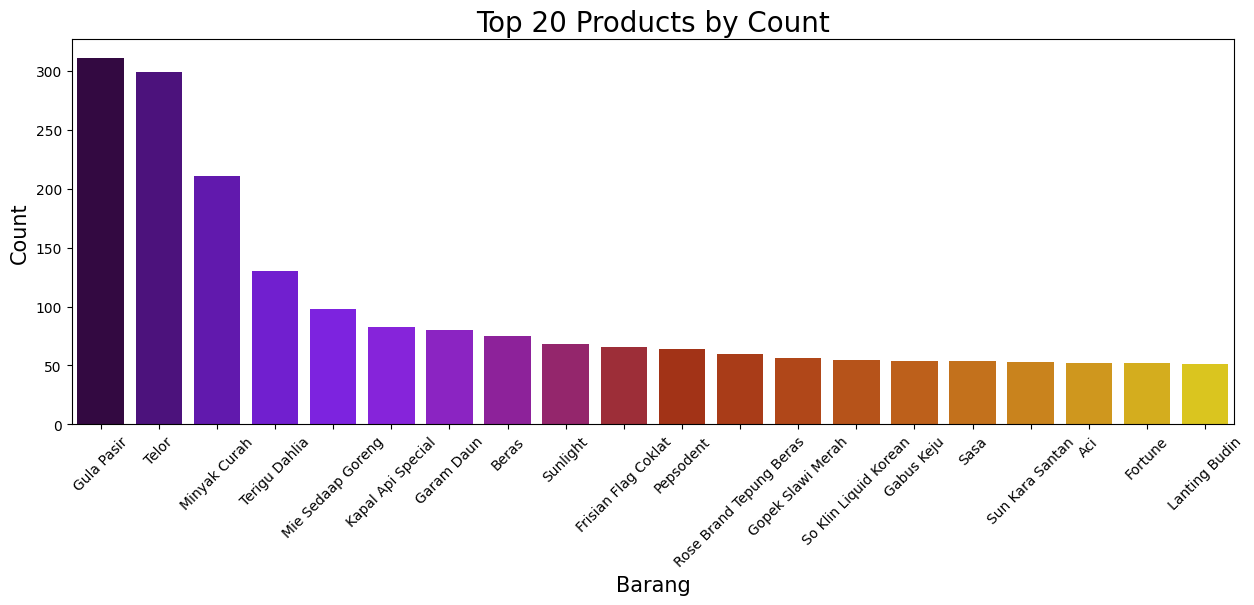

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x = df.Barang.value_counts().head(20).index, y = df.Barang.value_counts().head(20).values, palette = 'gnuplot')
plt.xlabel('Barang', size = 15)
plt.xticks(rotation=45)
plt.ylabel('Count', size = 15)
plt.title('Top 20 Products by Count', color = 'black', size = 20)
plt.show()

In [ ]:
from mlxtend.frequent_patterns import association_rules, apriori

In [ ]:
# frequent itemset
frequent_items = apriori(my_basket_sets, min_support = 0.01,use_colnames = True, max_len=None, verbose = 0, low_memory = True)
frequent_items['length'] = frequent_items['itemsets'].apply(lambda x: len(x))
frequent_items

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets,length
0,0.015129,(ABC Plus),1
1,0.026223,(Aci),1
2,0.019667,(Aqua),1
3,0.025719,(Bango),1
4,0.022189,(Bawang Merah),1
...,...,...,...
93,0.020676,"(Gula Pasir, Terigu Dahlia)",2
94,0.013111,"(Telor, Mie Sedaap Goreng)",2
95,0.027736,"(Telor, Minyak Curah)",2
96,0.014120,"(Minyak Curah, Terigu Dahlia)",2


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
frequent_items = apriori(my_basket_sets, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_items, metric="confidence", min_threshold=0.2)
rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Aci),(Minyak Curah),0.026223,0.106404,0.010086,0.384615,3.614655,0.007295,1.452093,0.742828
1,(Gopek Slawi Merah),(Gula Pasir),0.028240,0.156329,0.019667,0.696429,4.454896,0.015252,2.779152,0.798065
2,(Kapal Api Special),(Gula Pasir),0.041856,0.156329,0.018154,0.433735,2.774504,0.011611,1.489887,0.667515
3,(Minyak Curah),(Gula Pasir),0.106404,0.156329,0.022693,0.213270,1.364241,0.006059,1.072377,0.298784
4,(Sariwangi),(Gula Pasir),0.018659,0.156329,0.011094,0.594595,3.803487,0.008177,2.081056,0.751098
5,(Sosro),(Gula Pasir),0.017146,0.156329,0.010590,0.617647,3.950949,0.007910,2.206525,0.759926
6,(Gula Pasir),(Telor),0.156329,0.150782,0.035300,0.225806,1.497573,0.011729,1.096907,0.393818
7,(Telor),(Gula Pasir),0.150782,0.156329,0.035300,0.234114,1.497573,0.011729,1.101562,0.391245
8,(Terigu Dahlia),(Gula Pasir),0.065557,0.156329,0.020676,0.315385,2.017444,0.010427,1.232329,0.539705
9,(Mie Sedaap Goreng),(Telor),0.049420,0.150782,0.013111,0.265306,1.759539,0.005660,1.155881,0.454111


In [ ]:
rules.sort_values('confidence', ascending=False, inplace = True)
rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1,(Gopek Slawi Merah),(Gula Pasir),0.028240,0.156329,0.019667,0.696429,4.454896,0.015252,2.779152,0.798065
5,(Sosro),(Gula Pasir),0.017146,0.156329,0.010590,0.617647,3.950949,0.007910,2.206525,0.759926
4,(Sariwangi),(Gula Pasir),0.018659,0.156329,0.011094,0.594595,3.803487,0.008177,2.081056,0.751098
2,(Kapal Api Special),(Gula Pasir),0.041856,0.156329,0.018154,0.433735,2.774504,0.011611,1.489887,0.667515
0,(Aci),(Minyak Curah),0.026223,0.106404,0.010086,0.384615,3.614655,0.007295,1.452093,0.742828
12,(Terigu Dahlia),(Telor),0.065557,0.150782,0.022189,0.338462,2.244713,0.012304,1.283702,0.593411
8,(Terigu Dahlia),(Gula Pasir),0.065557,0.156329,0.020676,0.315385,2.017444,0.010427,1.232329,0.539705
9,(Mie Sedaap Goreng),(Telor),0.049420,0.150782,0.013111,0.265306,1.759539,0.005660,1.155881,0.454111
10,(Minyak Curah),(Telor),0.106404,0.150782,0.027736,0.260664,1.728748,0.011692,1.148622,0.471742
7,(Telor),(Gula Pasir),0.150782,0.156329,0.035300,0.234114,1.497573,0.011729,1.101562,0.391245


In [ ]:
res1 = rules[['antecedents','consequents','support','confidence']]
res1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,support,confidence
1,(Gopek Slawi Merah),(Gula Pasir),0.019667,0.696429
5,(Sosro),(Gula Pasir),0.010590,0.617647
4,(Sariwangi),(Gula Pasir),0.011094,0.594595
2,(Kapal Api Special),(Gula Pasir),0.018154,0.433735
0,(Aci),(Minyak Curah),0.010086,0.384615
12,(Terigu Dahlia),(Telor),0.022189,0.338462
8,(Terigu Dahlia),(Gula Pasir),0.020676,0.315385
9,(Mie Sedaap Goreng),(Telor),0.013111,0.265306
10,(Minyak Curah),(Telor),0.027736,0.260664
7,(Telor),(Gula Pasir),0.035300,0.234114


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# frequent itemset
frequent_items = apriori(my_basket_sets, min_support = 0.02,use_colnames = True, max_len=None, verbose = 0, low_memory = True)
frequent_items['length'] = frequent_items['itemsets'].apply(lambda x: len(x))
frequent_items

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets,length
0,0.026223,(Aci),1
1,0.025719,(Bango),1
2,0.022189,(Bawang Merah),1
3,0.020171,(Bawang Putih),1
4,0.037317,(Beras),1
5,0.026223,(Fortune),1
6,0.033283,(Frisian Flag Coklat),1
7,0.025214,(Frisian Flag Putih),1
8,0.027231,(Gabus Keju),1
9,0.040343,(Garam Daun),1


In [ ]:
# Uji Coba 1

frequent_items = apriori(my_basket_sets, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_items, metric="confidence", min_threshold=0.2)
rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Aci),(Minyak Curah),0.026223,0.106404,0.010086,0.384615,3.614655,0.007295,1.452093,0.742828
1,(Gopek Slawi Merah),(Gula Pasir),0.028240,0.156329,0.019667,0.696429,4.454896,0.015252,2.779152,0.798065
2,(Kapal Api Special),(Gula Pasir),0.041856,0.156329,0.018154,0.433735,2.774504,0.011611,1.489887,0.667515
3,(Minyak Curah),(Gula Pasir),0.106404,0.156329,0.022693,0.213270,1.364241,0.006059,1.072377,0.298784
4,(Sariwangi),(Gula Pasir),0.018659,0.156329,0.011094,0.594595,3.803487,0.008177,2.081056,0.751098
5,(Sosro),(Gula Pasir),0.017146,0.156329,0.010590,0.617647,3.950949,0.007910,2.206525,0.759926
6,(Gula Pasir),(Telor),0.156329,0.150782,0.035300,0.225806,1.497573,0.011729,1.096907,0.393818
7,(Telor),(Gula Pasir),0.150782,0.156329,0.035300,0.234114,1.497573,0.011729,1.101562,0.391245
8,(Terigu Dahlia),(Gula Pasir),0.065557,0.156329,0.020676,0.315385,2.017444,0.010427,1.232329,0.539705
9,(Mie Sedaap Goreng),(Telor),0.049420,0.150782,0.013111,0.265306,1.759539,0.005660,1.155881,0.454111


In [ ]:
rules.sort_values('confidence', ascending=False, inplace = True)
rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1,(Gopek Slawi Merah),(Gula Pasir),0.028240,0.156329,0.019667,0.696429,4.454896,0.015252,2.779152,0.798065
5,(Sosro),(Gula Pasir),0.017146,0.156329,0.010590,0.617647,3.950949,0.007910,2.206525,0.759926
4,(Sariwangi),(Gula Pasir),0.018659,0.156329,0.011094,0.594595,3.803487,0.008177,2.081056,0.751098
2,(Kapal Api Special),(Gula Pasir),0.041856,0.156329,0.018154,0.433735,2.774504,0.011611,1.489887,0.667515
0,(Aci),(Minyak Curah),0.026223,0.106404,0.010086,0.384615,3.614655,0.007295,1.452093,0.742828
12,(Terigu Dahlia),(Telor),0.065557,0.150782,0.022189,0.338462,2.244713,0.012304,1.283702,0.593411
8,(Terigu Dahlia),(Gula Pasir),0.065557,0.156329,0.020676,0.315385,2.017444,0.010427,1.232329,0.539705
9,(Mie Sedaap Goreng),(Telor),0.049420,0.150782,0.013111,0.265306,1.759539,0.005660,1.155881,0.454111
10,(Minyak Curah),(Telor),0.106404,0.150782,0.027736,0.260664,1.728748,0.011692,1.148622,0.471742
7,(Telor),(Gula Pasir),0.150782,0.156329,0.035300,0.234114,1.497573,0.011729,1.101562,0.391245


In [ ]:
res1 = rules[['antecedents','consequents','support','confidence']]
res1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,support,confidence
1,(Gopek Slawi Merah),(Gula Pasir),0.019667,0.696429
5,(Sosro),(Gula Pasir),0.010590,0.617647
4,(Sariwangi),(Gula Pasir),0.011094,0.594595
2,(Kapal Api Special),(Gula Pasir),0.018154,0.433735
0,(Aci),(Minyak Curah),0.010086,0.384615
12,(Terigu Dahlia),(Telor),0.022189,0.338462
8,(Terigu Dahlia),(Gula Pasir),0.020676,0.315385
9,(Mie Sedaap Goreng),(Telor),0.013111,0.265306
10,(Minyak Curah),(Telor),0.027736,0.260664
7,(Telor),(Gula Pasir),0.035300,0.234114


In [ ]:
res1 = rules[['antecedents','consequents','support','confidence','lift']]
res1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,support,confidence,lift
1,(Gopek Slawi Merah),(Gula Pasir),0.019667,0.696429,4.454896
5,(Sosro),(Gula Pasir),0.010590,0.617647,3.950949
4,(Sariwangi),(Gula Pasir),0.011094,0.594595,3.803487
2,(Kapal Api Special),(Gula Pasir),0.018154,0.433735,2.774504
0,(Aci),(Minyak Curah),0.010086,0.384615,3.614655
12,(Terigu Dahlia),(Telor),0.022189,0.338462,2.244713
8,(Terigu Dahlia),(Gula Pasir),0.020676,0.315385,2.017444
9,(Mie Sedaap Goreng),(Telor),0.013111,0.265306,1.759539
10,(Minyak Curah),(Telor),0.027736,0.260664,1.728748
7,(Telor),(Gula Pasir),0.035300,0.234114,1.497573


In [ ]:
# frequent itemset
frequent_items = apriori(my_basket_sets, min_support = 0.02,use_colnames = True, max_len=None, verbose = 0, low_memory = True)
frequent_items['length'] = frequent_items['itemsets'].apply(lambda x: len(x))
frequent_items

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets,length
0,0.026223,(Aci),1
1,0.025719,(Bango),1
2,0.022189,(Bawang Merah),1
3,0.020171,(Bawang Putih),1
4,0.037317,(Beras),1
5,0.026223,(Fortune),1
6,0.033283,(Frisian Flag Coklat),1
7,0.025214,(Frisian Flag Putih),1
8,0.027231,(Gabus Keju),1
9,0.040343,(Garam Daun),1


In [ ]:
# Uji Coba 2

frequent_items = apriori(my_basket_sets, min_support=0.02, use_colnames=True)
rules = association_rules(frequent_items, metric="confidence", min_threshold=0.2)
rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Minyak Curah),(Gula Pasir),0.106404,0.156329,0.022693,0.213270,1.364241,0.006059,1.072377,0.298784
1,(Gula Pasir),(Telor),0.156329,0.150782,0.035300,0.225806,1.497573,0.011729,1.096907,0.393818
2,(Telor),(Gula Pasir),0.150782,0.156329,0.035300,0.234114,1.497573,0.011729,1.101562,0.391245
3,(Terigu Dahlia),(Gula Pasir),0.065557,0.156329,0.020676,0.315385,2.017444,0.010427,1.232329,0.539705
4,(Minyak Curah),(Telor),0.106404,0.150782,0.027736,0.260664,1.728748,0.011692,1.148622,0.471742
5,(Terigu Dahlia),(Telor),0.065557,0.150782,0.022189,0.338462,2.244713,0.012304,1.283702,0.593411


In [ ]:
rules.sort_values('confidence', ascending=False, inplace = True)
rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
5,(Terigu Dahlia),(Telor),0.065557,0.150782,0.022189,0.338462,2.244713,0.012304,1.283702,0.593411
3,(Terigu Dahlia),(Gula Pasir),0.065557,0.156329,0.020676,0.315385,2.017444,0.010427,1.232329,0.539705
4,(Minyak Curah),(Telor),0.106404,0.150782,0.027736,0.260664,1.728748,0.011692,1.148622,0.471742
2,(Telor),(Gula Pasir),0.150782,0.156329,0.035300,0.234114,1.497573,0.011729,1.101562,0.391245
1,(Gula Pasir),(Telor),0.156329,0.150782,0.035300,0.225806,1.497573,0.011729,1.096907,0.393818
0,(Minyak Curah),(Gula Pasir),0.106404,0.156329,0.022693,0.213270,1.364241,0.006059,1.072377,0.298784


In [ ]:
res1 = rules[['antecedents','consequents','support','confidence']]
res1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,support,confidence
5,(Terigu Dahlia),(Telor),0.022189,0.338462
3,(Terigu Dahlia),(Gula Pasir),0.020676,0.315385
4,(Minyak Curah),(Telor),0.027736,0.260664
2,(Telor),(Gula Pasir),0.035300,0.234114
1,(Gula Pasir),(Telor),0.035300,0.225806
0,(Minyak Curah),(Gula Pasir),0.022693,0.213270


In [ ]:
res1 = rules[['antecedents','consequents','support','confidence','lift']]
res1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,support,confidence,lift
5,(Terigu Dahlia),(Telor),0.022189,0.338462,2.244713
3,(Terigu Dahlia),(Gula Pasir),0.020676,0.315385,2.017444
4,(Minyak Curah),(Telor),0.027736,0.260664,1.728748
2,(Telor),(Gula Pasir),0.035300,0.234114,1.497573
1,(Gula Pasir),(Telor),0.035300,0.225806,1.497573
0,(Minyak Curah),(Gula Pasir),0.022693,0.213270,1.364241


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
